# MPC Home assignments util resource
Python scripts to help solve and implement the home assignments from MPC. These assignments are used to confirm if the implemented MPC solver/scripts are working as expected.

In [1]:
import numpy as np
from scipy.linalg import expm
import sympy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x1, x2, x3, x4 = sympy.symbols('x1 x2 x3 x4')
a, b, p, q = sympy.symbols('a b p q')
c, r = sympy.symbols('c r')

nl_fx = np.array([[x2],[a*x4+b*sympy.sin(x1)], [x4], [p*x4+q*sympy.sin(x1)]])
nl_gx = np.array([[0],[c],[0],[r]])

In [3]:
a = -0.9421
b = 82.7231
c = 14.2306
p = -3.7808
q = 4.9952
r = 57.1120

A_c = np.array([[0, 1, 0, 0],
                [b, 0, 0, a],
                [0, 0, 0, 1],
                [q, 0, 0, p]])

B_c = np.array([[0],[c],[0],[r]])

C_1 = np.array([[1, 0, 0, 0]])

h = 0.01

def convert_to_discrete(A_c: np.ndarray, B_c: np.ndarray, h: float):
    num_states = A_c.shape[0]
    num_inputs = B_c.shape[1]
    continuous_matrix = np.concat((A_c, B_c), axis=1)
    continuous_matrix = np.concat((continuous_matrix, np.zeros((1, num_states+num_inputs)))) * h

    discrete_matrix = expm(continuous_matrix)

    A_d = discrete_matrix[:num_states, :num_states]
    B_d = discrete_matrix[:num_states, num_states:]

    return A_d, B_d


A_d, B_d = convert_to_discrete(A_c, B_c, h)



In [4]:
def convert_np_to_cpp(M: np.ndarray):
    msg = "{"
    rows = M.shape[0]
    cols = M.shape[1]
    for i, row in enumerate(M):
        msg += "{"
        for j, col in enumerate(row):
            msg += f"{round(col, 4)}"
            if j < cols - 1:
                msg += ", "
        msg += "}"
        if i < rows - 1:
                msg += ",\n"
    msg += "}"
    print(msg)

convert_np_to_cpp(np.eye(4))

{{1.0, 0.0, 0.0, 0.0},
{0.0, 1.0, 0.0, 0.0},
{0.0, 0.0, 1.0, 0.0},
{0.0, 0.0, 0.0, 1.0}}


In [5]:
r1n40 = pd.read_csv("4_R_1.000000_N_40.csv")
r1n80 = pd.read_csv("4_R_1.000000_N_80.csv")
r01n40 = pd.read_csv("4_R_0.100000_N_40.csv")
r01n80 = pd.read_csv("4_R_0.100000_N_80.csv")

# data

test_data = pd.read_csv("test_file.csv")

In [6]:
r1n40

,x1,x2,x3,x4,u
0,0.082673,0.000000,0.000000,0.000000,-4.740200
1,0.079694,-0.594218,-0.013256,-2.652820,-2.501830
2,0.072328,-0.855744,-0.046243,-3.952880,-1.259710
3,0.063185,-0.938703,-0.088494,-4.508920,-0.573565
4,0.053655,-0.928480,-0.134275,-4.660200,-0.197544
...,...,...,...,...,...
195,0.000094,-0.000609,-0.595159,0.126439,0.007883
196,0.000093,-0.000608,-0.593898,0.126171,0.007866
197,0.000093,-0.000607,-0.592639,0.125904,0.007850
198,0.000093,-0.000606,-0.591384,0.125637,0.007833


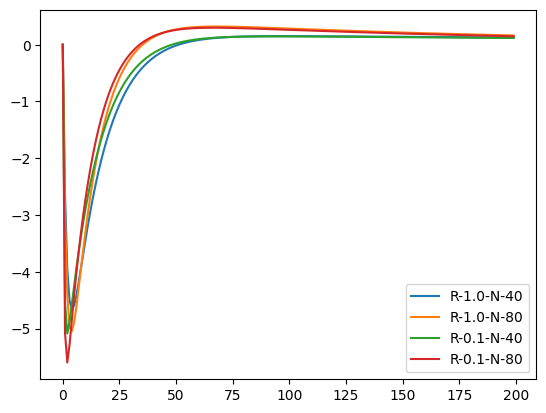

In [7]:
t = range(r1n80.shape[0])

value = "x4"

plt.plot(t, r1n40[value], label="R-1.0-N-40")
plt.plot(t, r1n80[value], label="R-1.0-N-80")
plt.plot(t, r01n40[value], label="R-0.1-N-40")
plt.plot(t, r01n80[value], label="R-0.1-N-80")
# plt.plot(t, test_data["u1"], label="test_data")
plt.legend()

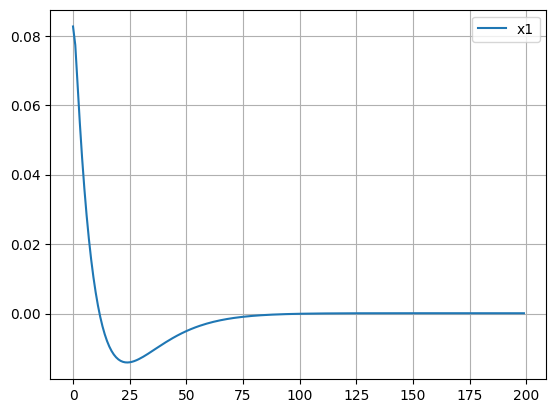

In [8]:
t = range(r1n80.shape[0])

value = "x4"

plt.plot(t, r01n40["x1"], label="x1")
# plt.plot(t, r01n40["x2"], label="x2")
# plt.plot(t, r01n40["x3"], label="x3")
# plt.plot(t, r01n40["x4"], label="x4")
# plt.plot(t, test_data["u1"], label="test_data")
plt.legend()
plt.grid()
plt.show()

In [9]:
a: pd.Series = r01n40[value]

a = a.to_numpy()

mid_a = float(np.mean(a))

range_a = max(a) - min(a)

mid_a, range_a

# b = (mid_a - range_a / 2) / max(a) 
# c = (mid_a + range_a / 2) / max(a) 

# if min(a) < 0:
#     ma = max(a)
#     MA = ma - min(a)
#     b = (a - min(a)) / MA - 0.5
# else:
#     ma = max(a)
#     MA = ma + min(a)
#     b = (a + min(a)) / MA - 0.5

# u = test_data["u1"].to_numpy()

a_max = max(a)
a_abs_min = abs(min(a))

b = (a + a_abs_min) / (a_max + a_abs_min) - 0.5
# c = abs((b + 0.5)) * (a_max + a_abs_min) - a_abs_min
# c = (u + abs(min(u))) / (max(u) + abs(min(u))) - 0.5
# b

a[2], b[2]

(np.float64(-5.08761), np.float64(-0.5))

In [10]:
MAX = 800

x = 0.428571
scaleEdgeValue = 0.6
# maxVal = MAX * 0.8
# minVal = MAX * 0.2

maxVal = 208
minVal = -190
absMinVal = abs(minVal)

# X = x/abs(x) * (abs(x) - scaleEdgeValue)  * (maxVal + minVal) + minVal + maxVal * 0.4
X = (x + scaleEdgeValue) * (maxVal - absMinVal) + minVal

x, X, x + scaleEdgeValue, (maxVal + absMinVal), x/abs(x)

(0.428571, -171.485722, 1.028571, 398, 1.0)

In [22]:
MAX = 800

# a = np.linspace(0.2 * MAX, 0.8 * MAX, 100)
a = np.linspace(-190, 208, 100)
a_max = max(a)
a_abs_min = abs(min(a))
b = (a + a_abs_min) / (a_max + a_abs_min) - 0.5
c = (b + 0.5) * (a_max + a_abs_min) - a_abs_min
a[10], b[10], c[10]

(np.float64(-149.7979797979798),
 np.float64(-0.398989898989899),
 np.float64(-149.7979797979798))